In [1]:
require(tidyverse)
require(data.table)


Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



In [2]:
gcount_df <- fread(
    '/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/notebook/20191021_snpnet/private_out/9/QPHE/results/meta/train.subset.gcount.tsv'
)

In [3]:
out <- list()
out[["pnas"]]  <- gcount_df %>% select(stats_pNAs) %>% pull()
out[["means"]] <- gcount_df %>% select(stats_means) %>% pull()
out[["sds"]]   <- gcount_df %>% select(stats_SDs) %>% pull()

for(key in names(out)){
names(out[[key]]) <- gcount_df %>% select(ID) %>% pull()
}    
out[["excludeSNP"]] <- names(out[["means"]])[(out[["pnas"]] > 0.1) | (out[["means"]] < 2 * 0.001)]

stats <- out

In [4]:
res <- fread(
    '/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/notebook/20191021_snpnet/private_out/9/QPHE/results/debug/residuals_iter_5.tsv', 
    sep='\t', head=T
) %>% rename('ID' = 'V1')


In [6]:
pfile <- '/oak/stanford/groups/mrivas/projects/snpnet/sample_data/train'


In [7]:
traw <- fread(paste0(pfile, '.traw'))


In [9]:
sample_IDs <- traw %>% colnames() %>% tail(length(colnames(traw)) -6)
variant_IDs <- traw %>% mutate(ID = paste0(SNP, '_', ALT)) %>% select(ID) %>% pull()

geno_mat <- as.matrix(2 - traw %>% select(-CHR, -SNP, -'(C)M', -POS, -COUNTED, -ALT))
rownames(geno_mat) <- variant_IDs


In [10]:
means <- lapply(1:length(variant_IDs), function(i){mean(geno_mat[i, ], na.rm=TRUE)})
names(means) <- variant_IDs


In [11]:
max(abs(as.numeric(means) - as.numeric(stats[['means']])))


[1] 4.884981e-15

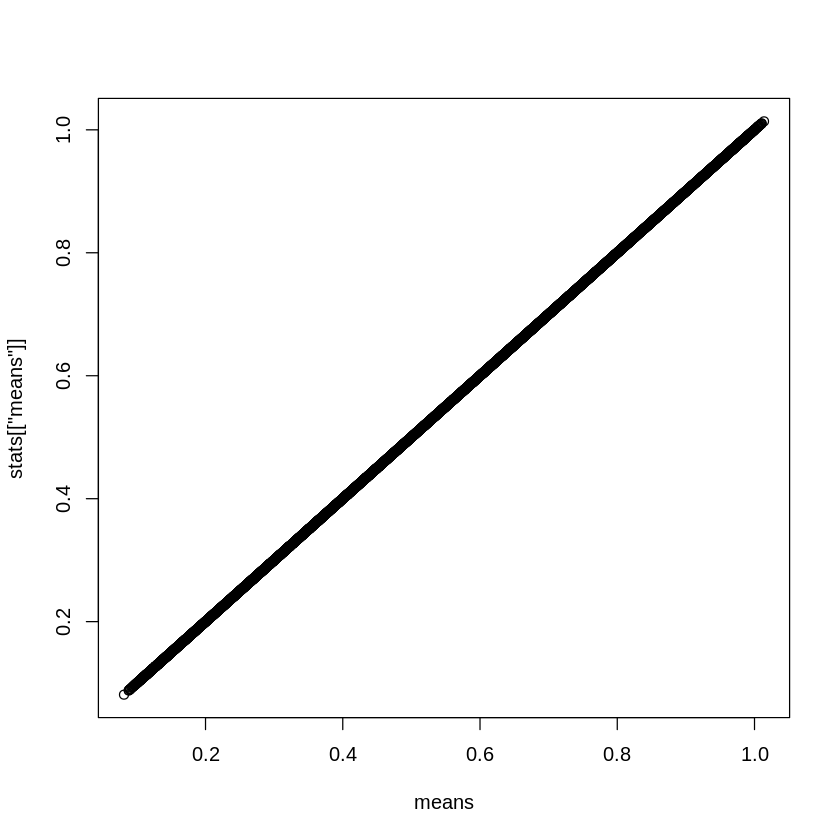

In [12]:
plot(means, stats[['means']])


In [13]:
length(variant_IDs)
length(sample_IDs)


[1] 8000

[1] 1600

In [14]:
res26 <- res %>% select('26') %>% pull()


In [15]:
geno_mat %>% dim()

[1] 8000 1600

In [31]:
# for(i in 1:length(variant_IDs)){
for(i in 1:10){
    geno_mat[i, is.na(geno_mat[i, ])] <- mean(geno_mat[i, ], na.rm=T)
}


In [33]:
(geno_mat[1:10, ] %*% matrix(res26, ncol=1) )

null_0_L,-61.115945
null_1_L,41.390474
null_2_L,25.476100
null_3_H,31.177572
null_4_H,-1.395682
null_5_L,-61.113177
null_6_L,-4.152888
null_7_H,-44.183023
null_8_L,2.456228
null_9_H,-4.633246


In [28]:
 %>% dim()

[1] 1600    1

In [ ]:
compute_dot_with_NAs <- function(vec, geno, varIdx){
    gv <- geno[varIdx, ]
    gv[is.na(gv)] <- mean(gv, na.rm = T)
    vec %*% gv
}

In [ ]:
matrix(res26, ncol=1)

In [141]:
raw <- fread(paste0(pfile, '.raw'))


In [142]:
raw %>% colnames() %>% head(10)

[1] "FID"       "IID"       "PAT"       "MAT"       "SEX"       "PHENOTYPE"
 [7] "null_0_H"  "null_1_H"  "null_2_H"  "null_3_L"

[1] 8000

[1] 1600

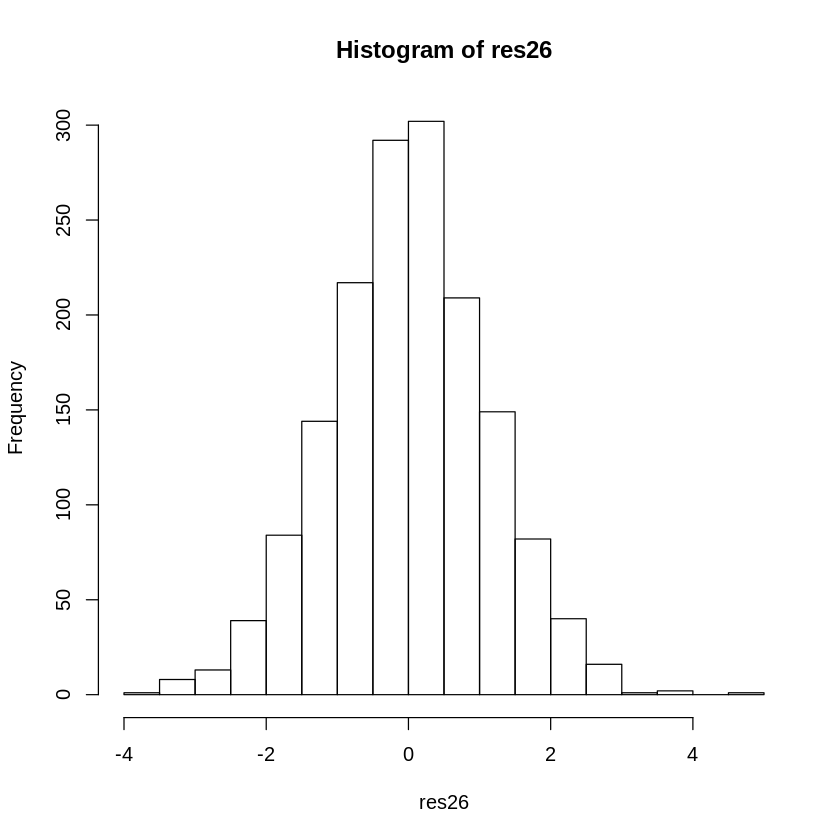

In [123]:
hist(res26)

In [133]:
geno_mat_imputed<- geno_mat
for(i in 1:length(variant_IDs)){
    geno_mat_imputed[i, is.na(geno_mat_imputed[i, ])] <- mean(geno_mat_imputed[i, ], rm.na = T)
}


In [134]:
compute_dot_with_NAs(res26, geno_mat, 1)

-61.11595


In [135]:
require(pgenlibr)

In [137]:
getwd()

[1] "/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/notebook/20191021_snpnet"

In [138]:
vscores <- matrix(VariantScores(pgen, res26), ncol=1)

ERROR: Error in VariantScores(pgen, res26): could not find function "VariantScores"


In [ ]:
variantIdx <- 1
geon_vec[i, is.na(data[i,])] <- mean(data[,i], na.rm = TRUE)
geon_vec <- data[is.na(data[,i]), i] <- mean(data[,i], na.rm = TRUE)

In [102]:
geno_mat[1, ] %*% ()

NA


In [100]:
1:5 %*% 1:5

55


In [101]:
1 + 2 * 2 + 3 * 3 + 4 * 4 + 5 * 5

[1] 55